In [17]:
from high_level_tdc import *
from time import sleep
from matplotlib import pyplot as plt
import numpy as np

In [18]:
clear_hw_trig()
#trigger_on_chan(0)
#trigger_on_chan(4)
bin(get_hw_trig_map())

'0b0'

In [20]:
disable_calib_pulser()
#enable_calib_pulser()

print(read_scaler(0))
for i in range(0,2):
  print(scaler_rate(i,delay=0.1))

[2827, 95905]
2061.917508303904
2069.895803634558


In [24]:
wait_for_trig(timeout=2)
get_trig_state()

0

ta pre  (ns) 24831855.833
tb pre  (ns) 24831859.583
ta post (ns) 25314927.500
tb post (ns) 25314931.250

ta pre  (ns) 30150069.167
tb pre  (ns) 30150073.333
ta post (ns) 30633476.667
tb post (ns) 30633480.417

ta pre  (ns) 35471026.667
tb pre  (ns) 35471030.417
ta post (ns) 35954989.583
tb post (ns) 35954993.333

ta pre  (ns) 40308044.583
tb pre  (ns) 40308048.333
ta post (ns) 40792019.583
tb post (ns) 40792023.333

ta pre  (ns) 45629149.583
tb pre  (ns) 45629153.333
ta post (ns) 46112562.917
tb post (ns) 46112566.667



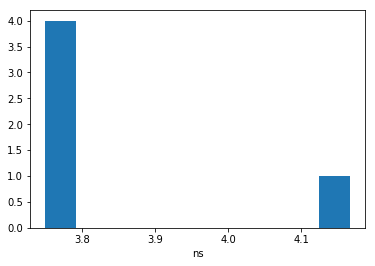

In [27]:

tdiff =  []

disable_calib_pulser()
#enable_calib_pulser()

# triggering pulse is stored in post register

a = 0
b = 1

trigger_on_chan(0)


for i in range(0,5):
  arm()
  sleep(0.002)
  #trigger()
  sleep(0.002)
  tapre = read_pre_t1(a)
  tbpre = read_pre_t1(b)
  tapost = read_t1(a)
  tbpost = read_t1(b)
  print("ta pre  (ns) {:3.3f}".format(tapre*1e9))
  print("tb pre  (ns) {:3.3f}".format(tbpre*1e9))
  print("ta post (ns) {:3.3f}".format(tapost*1e9))
  print("tb post (ns) {:3.3f}".format(tbpost*1e9))
  print()

  tdiff += [tbpre-tapre]

tdiff = np.array(tdiff)

plt.hist(tdiff*1e9)
plt.xlabel("ns")
plt.show()